In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# EDA

## Handling null values and duplicates

In [75]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [76]:
df["loan_id"].duplicated().sum()

np.int64(0)

In [5]:
# There are no null values or duplicates in the data

In [77]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
# Some Isights

# The avg for every customer is around 2 -3 
# The avg income of the customer is around 50.59 lakhs
# The avg loan amount is around 1.51 cr

In [78]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [79]:
# We can see white spaces here which we need to strp
df.columns = df.columns.str.strip()
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [80]:
# The white spaces is removed now

# Just to be sure removing leading / trailing spaces 
for col in df.select_dtypes(include = ["object"]).columns:
    df[col] = df[col].str.strip()

# Univariate Analysis

In [88]:
lona_approved = len(df[df["loan_status"] == "Approved"])
lona_not_approved = len(df[df["loan_status"] == "Rejected"])


print("Percentage of Loan Approved is {:.2f}%".format(lona_approved/len(df.loan_status)*100))
print("Percentage of Loan Not Approved is {:.2f}%".format(lona_not_approved/len(df.loan_status)*100))

Percentage of Loan Approved is 62.22%
Percentage of Loan Not Approved is 37.78%


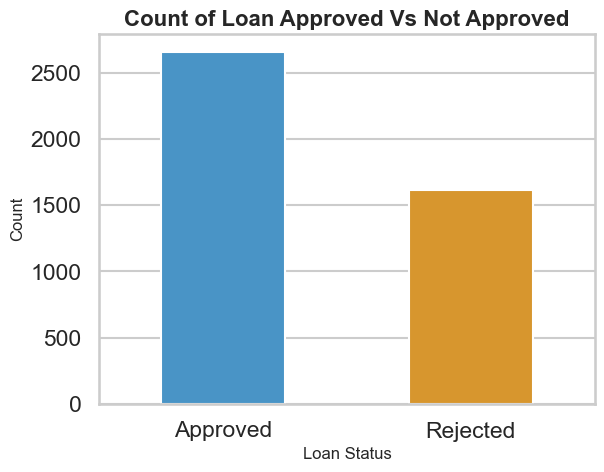

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Style and context
sns.set_style("whitegrid")
sns.set_context("talk")  # bigger font for presentation

# Countplot
sns.countplot(
    x="loan_status",
    data=df,
    hue="loan_status",
    palette=["#3498db", "#f39c12"],  # new colors (blue, orange)
    legend=False,
    width=0.5   # make bars slimmer
)

# Title and labels
plt.title("Count of Loan Approved Vs Not Approved", fontsize=16, fontweight="bold")
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show
plt.show()





In [93]:
graduated = len(df[df["education"] == "Graduate"])
not_graduated = len(df[df["education"] == "Not Graduate"])

print("Percentage of Graduated is {:.2f}%".format(graduated/len(df.education)*100))
print("Percentage of Not Graduated is {:.2f}%".format(not_graduated/len(df.education)*100))

Percentage of Graduated is 50.22%
Percentage of Not Graduated is 49.78%


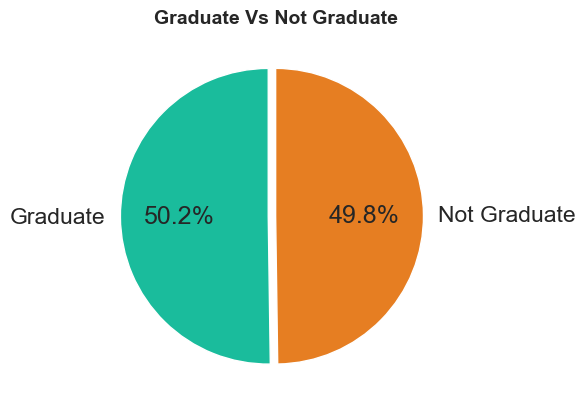

In [96]:
import matplotlib.pyplot as plt

# New colors (Teal & Orange)
colors = ["#1abc9c", "#e67e22"]

# Create Pie Chart
df["education"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    startangle=90, 
    colors=colors, 
    wedgeprops={"edgecolor":"white", "linewidth":1},
    explode=[0.05, 0]   # Slightly separate the first slice
)

# Title & Labels
plt.title("Graduate Vs Not Graduate", fontsize=14, fontweight="bold")
plt.ylabel("")  # remove y-label for clean look
plt.show()






In [97]:
# Count of Graduate vs Not Graduate

self_employed = len(df[df["self_employed"] == "Yes"])
not_self_employed = len(df[df["self_employed"] == "No"])

print("Percentage of Customers Self Employed is {:.2f}%".format(self_employed/len(df.self_employed)*100))
print("Percentage of Customers not Self Employed is {:.2f}%".format(not_self_employed/len(df.self_employed)*100))

Percentage of Customers Self Employed is 50.36%
Percentage of Customers not Self Employed is 49.64%


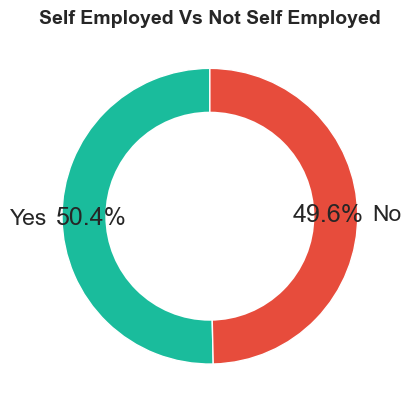

In [98]:
import matplotlib.pyplot as plt

# Colors (Teal & Red)
colors = ["#1abc9c", "#e74c3c"]

# Pie chart with "donut" style
df["self_employed"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    startangle=90, 
    colors=colors, 
    wedgeprops={"edgecolor":"white", "linewidth":1},
    pctdistance=0.8  # move % labels closer to center
)

# Add white circle in the center to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title("Self Employed Vs Not Self Employed", fontsize=14, fontweight="bold")
plt.ylabel("")  # remove extra y-label
plt.show()



In [18]:
# 17.6% of customers have 4 dependents

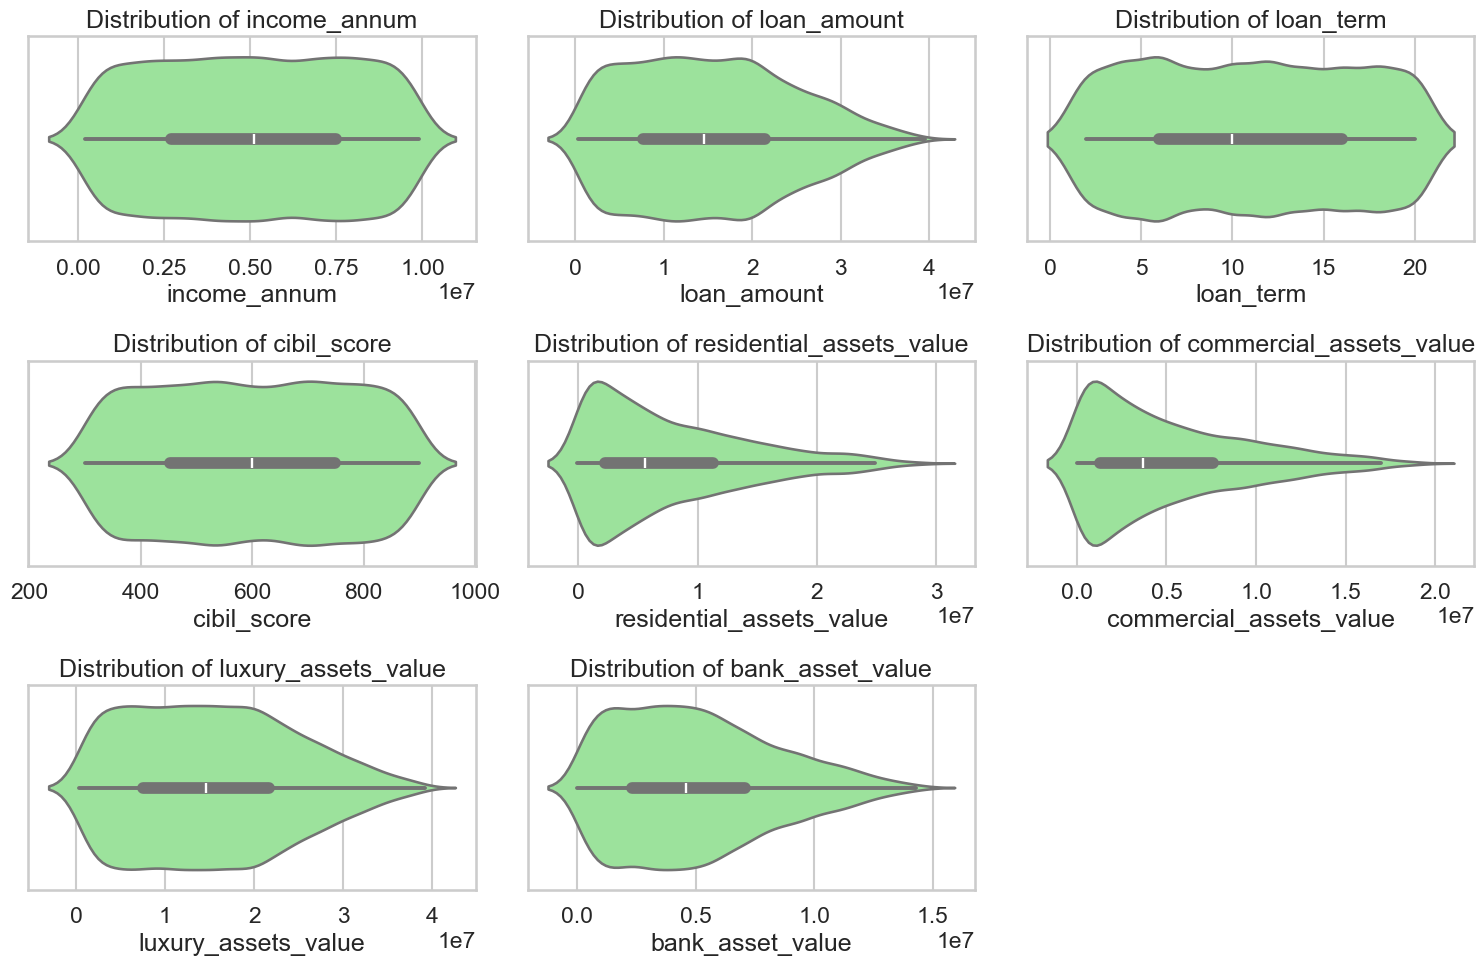

In [99]:
plt.figure(figsize=(15, 10))

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x=df[cols[i]], color="lightgreen")
    plt.title(f'Distribution of {cols[i]}')

plt.tight_layout()
plt.show()






In [20]:
# We can see here most of the data do not follow a normal distribution

In [21]:
# Which wiil be corrected later

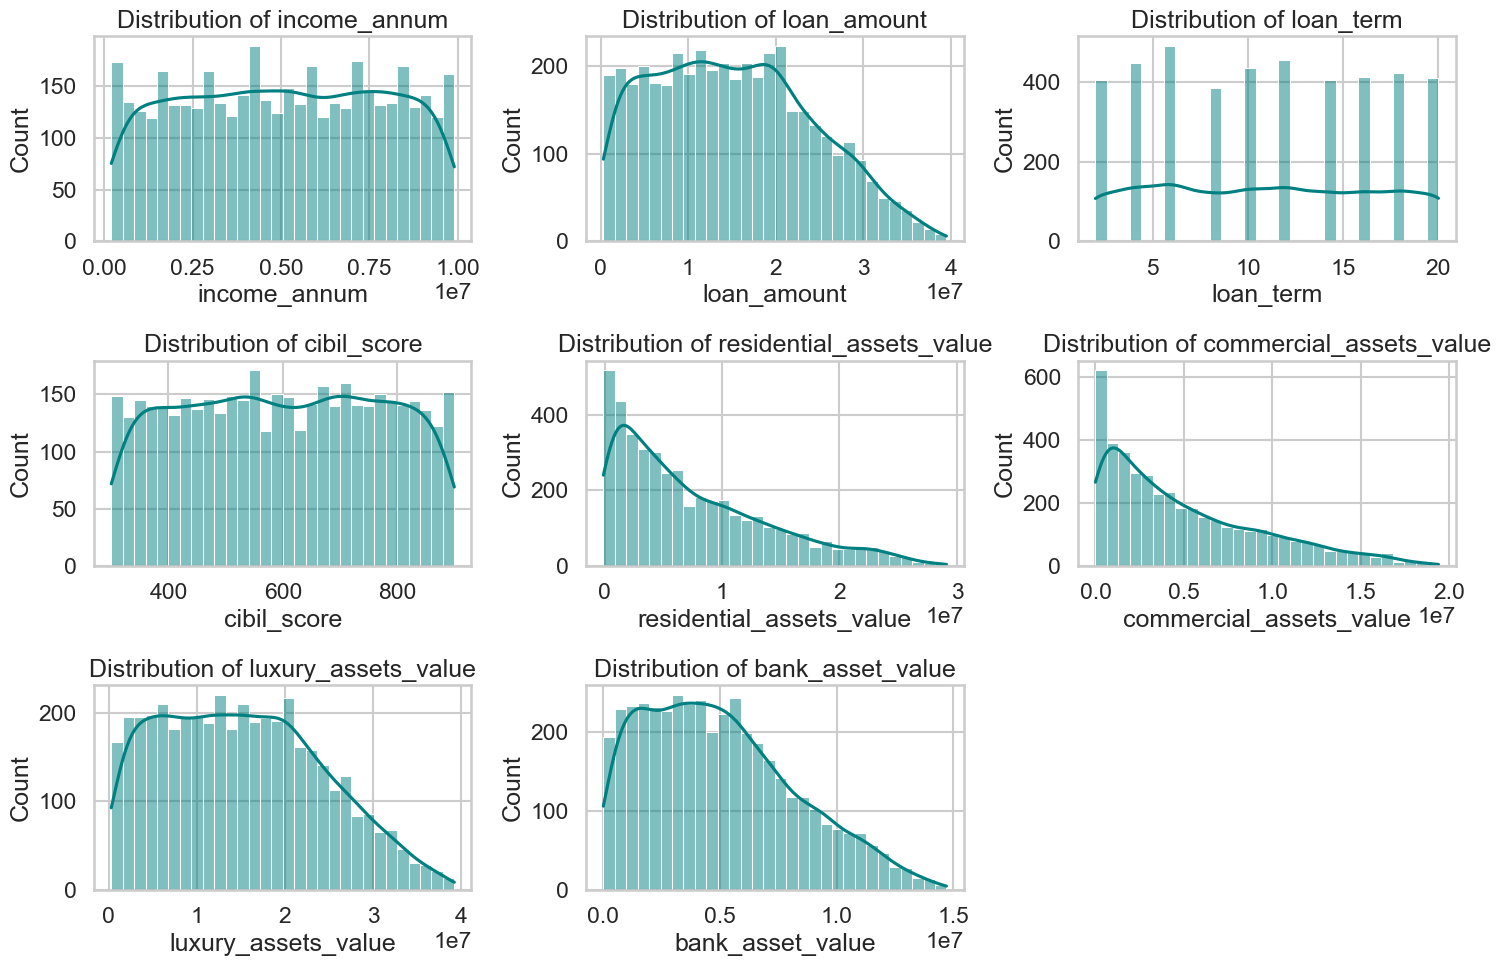

In [100]:

plt.figure(figsize=(15, 10))

cols = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)  # 3 rows × 3 cols grid
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [23]:
# Ressidential asset value and commercial asset value col have outliers

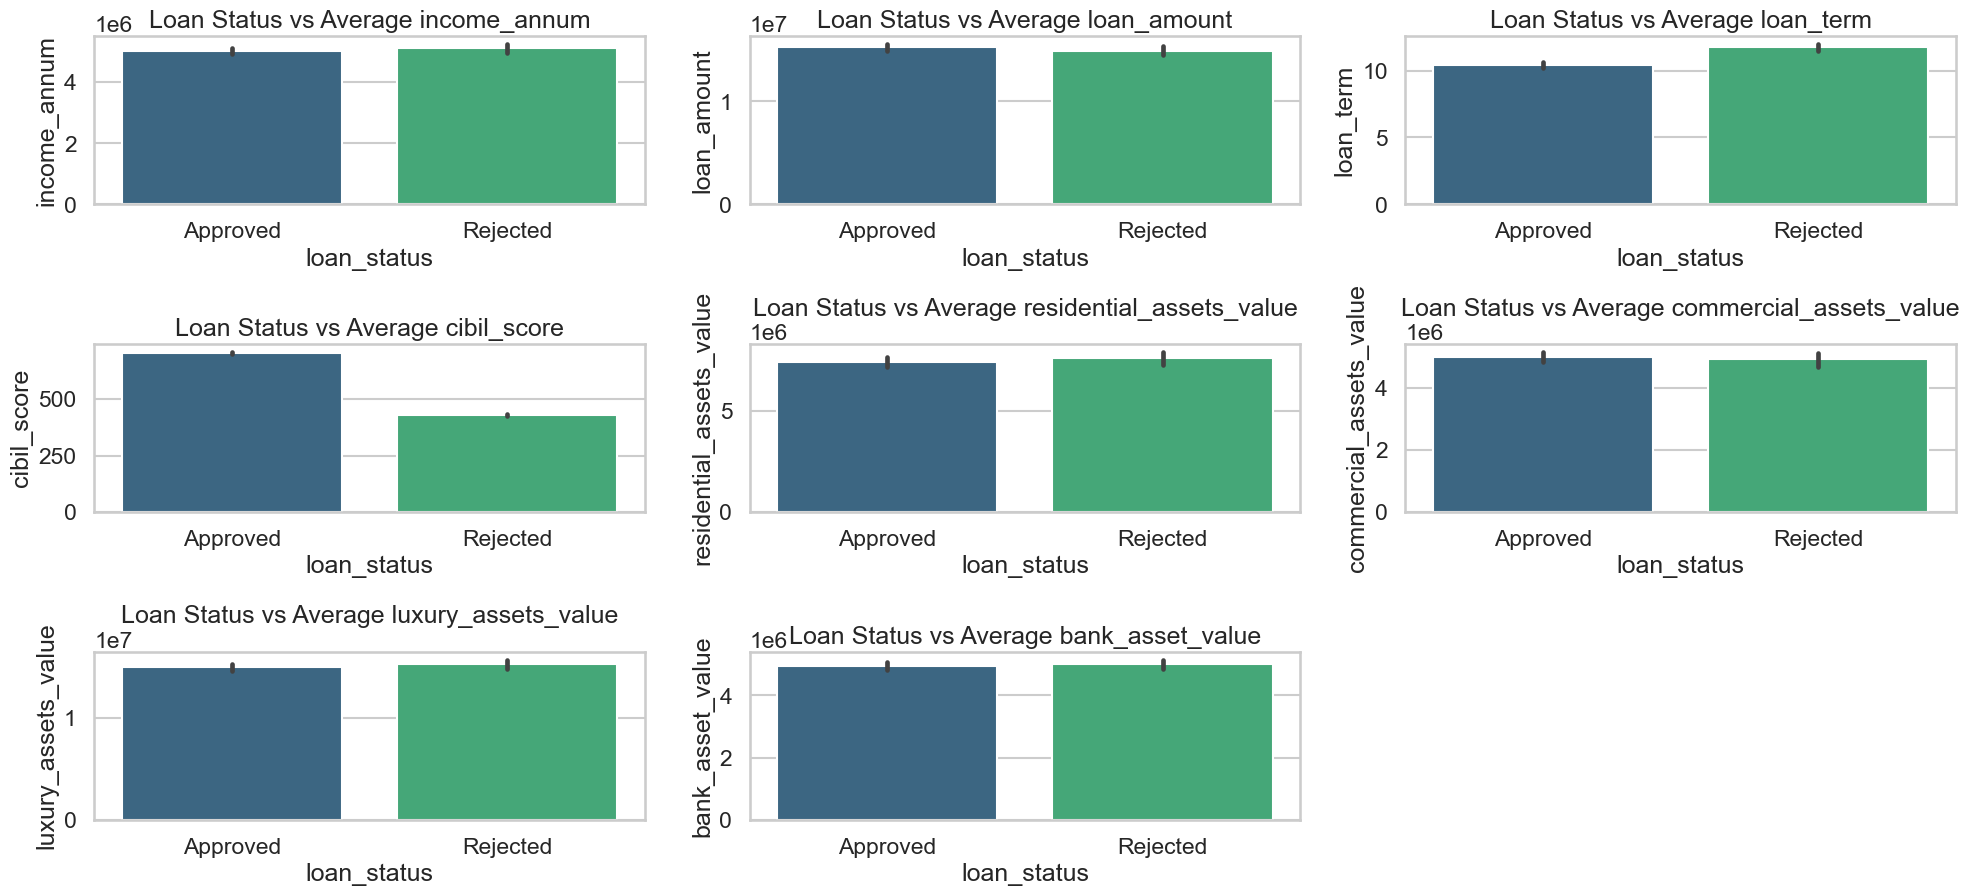

In [101]:
plt.figure(figsize=(20, 15))

for i in range(len(cols)):
    plt.subplot(5, 3, i + 1)
    sns.barplot(
        data=df,
        x="loan_status",
        y=cols[i],
        hue="loan_status",     # ✅ fix: assign hue
        palette="viridis",
        legend=False,          # ✅ fix: no duplicate legend
        dodge=False            # ✅ keeps single bar per category
    )
    plt.title(f'Loan Status vs Average {cols[i]}')

plt.tight_layout()
plt.show()


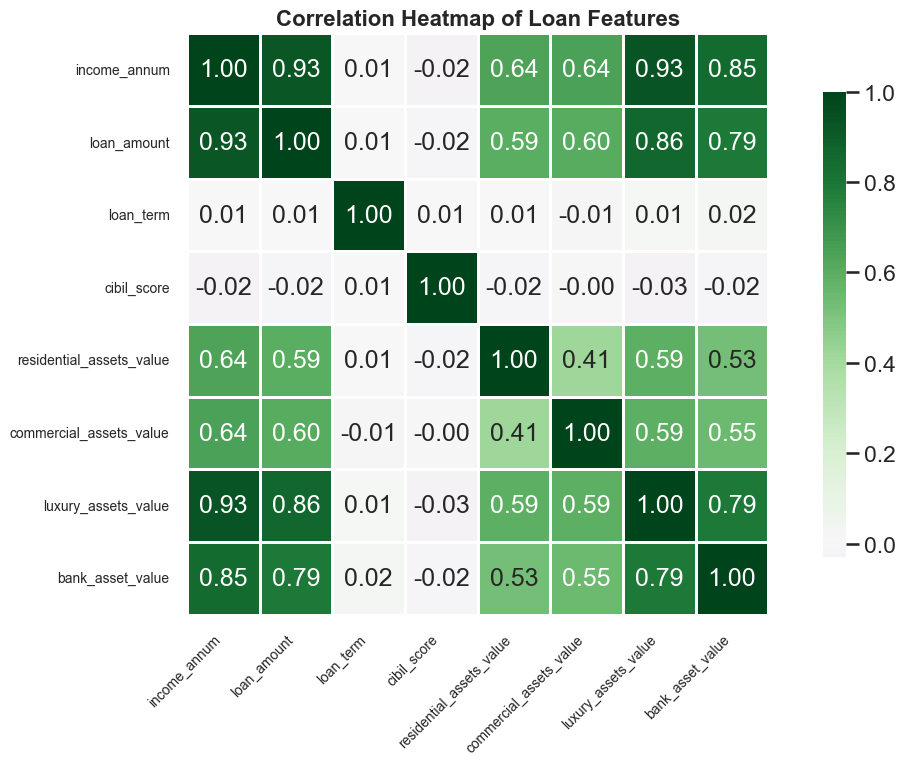

In [102]:
plt.figure(figsize=(12, 8))

corr = df[cols].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="PRGn",           # green ↔ purple
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Loan Features", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()




# Data Preprocessing

In [112]:
model_data = df.copy()

In [113]:
model_data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [114]:
# Removing unnecessary cols
model_data = model_data.drop(["loan_id"], axis=1)

In [115]:
model_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [116]:
# Removing Null Values
model_data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [39]:
# There are no null values in the model data

In [41]:
# Data Transformation

In [117]:
model_data["loan_term"] = np.sqrt(model_data.loan_term)
model_data["cibil_score"] = np.sqrt(model_data.cibil_score)

In [119]:
model_data["income_annum"] = np.log1p(model_data.income_annum)
model_data["loan_amount"] = np.log1p(model_data.loan_amount)
model_data["residential_assets_value"] = np.log1p(model_data.residential_assets_value)
model_data["commercial_assets_value"] = np.log1p(model_data.commercial_assets_value)
model_data["luxury_assets_value"] = np.log1p(model_data.luxury_assets_value)
model_data["bank_asset_value"] = np.log1p(model_data.bank_asset_value)

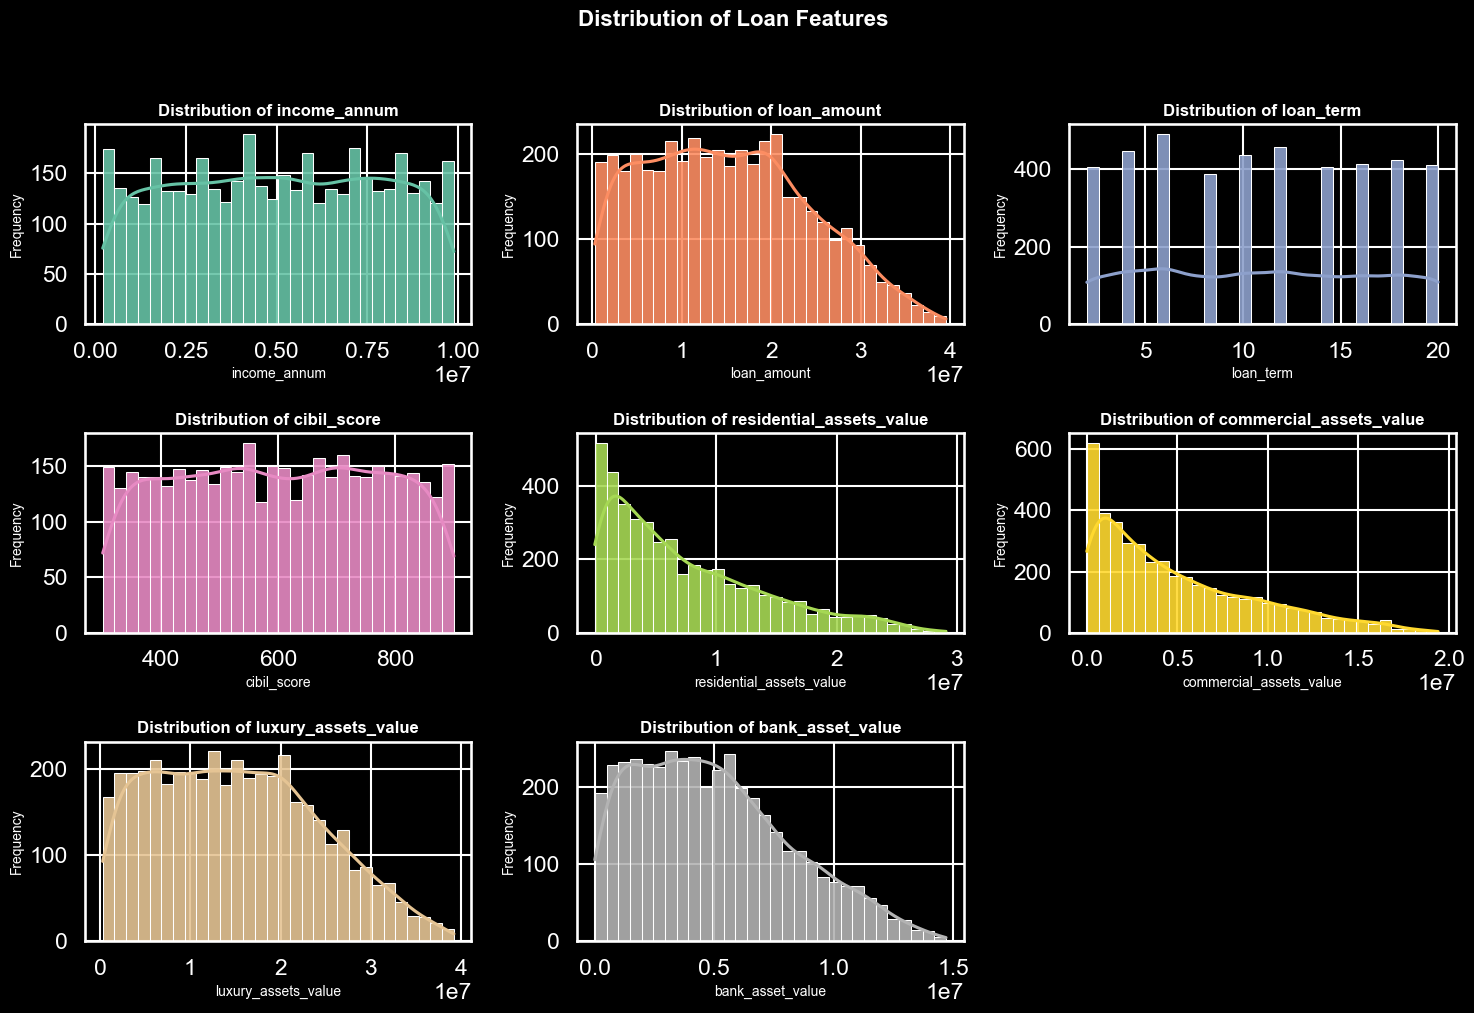

In [120]:
plt.style.use("dark_background")
plt.figure(figsize=(15, 10))

colors = sns.color_palette("Set2")  # bright but not harsh

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(
        df[cols[i]], 
        kde=True, 
        bins=30, 
        color=colors[i % len(colors)], 
        alpha=0.9
    )
    plt.title(f"Distribution of {cols[i]}", fontsize=12, fontweight="bold", color="white")
    plt.xlabel(cols[i], fontsize=10, color="white")
    plt.ylabel("Frequency", fontsize=10, color="white")

plt.suptitle("Distribution of Loan Features", fontsize=16, fontweight="bold", color="white", y=1.02)
plt.tight_layout()
plt.show()



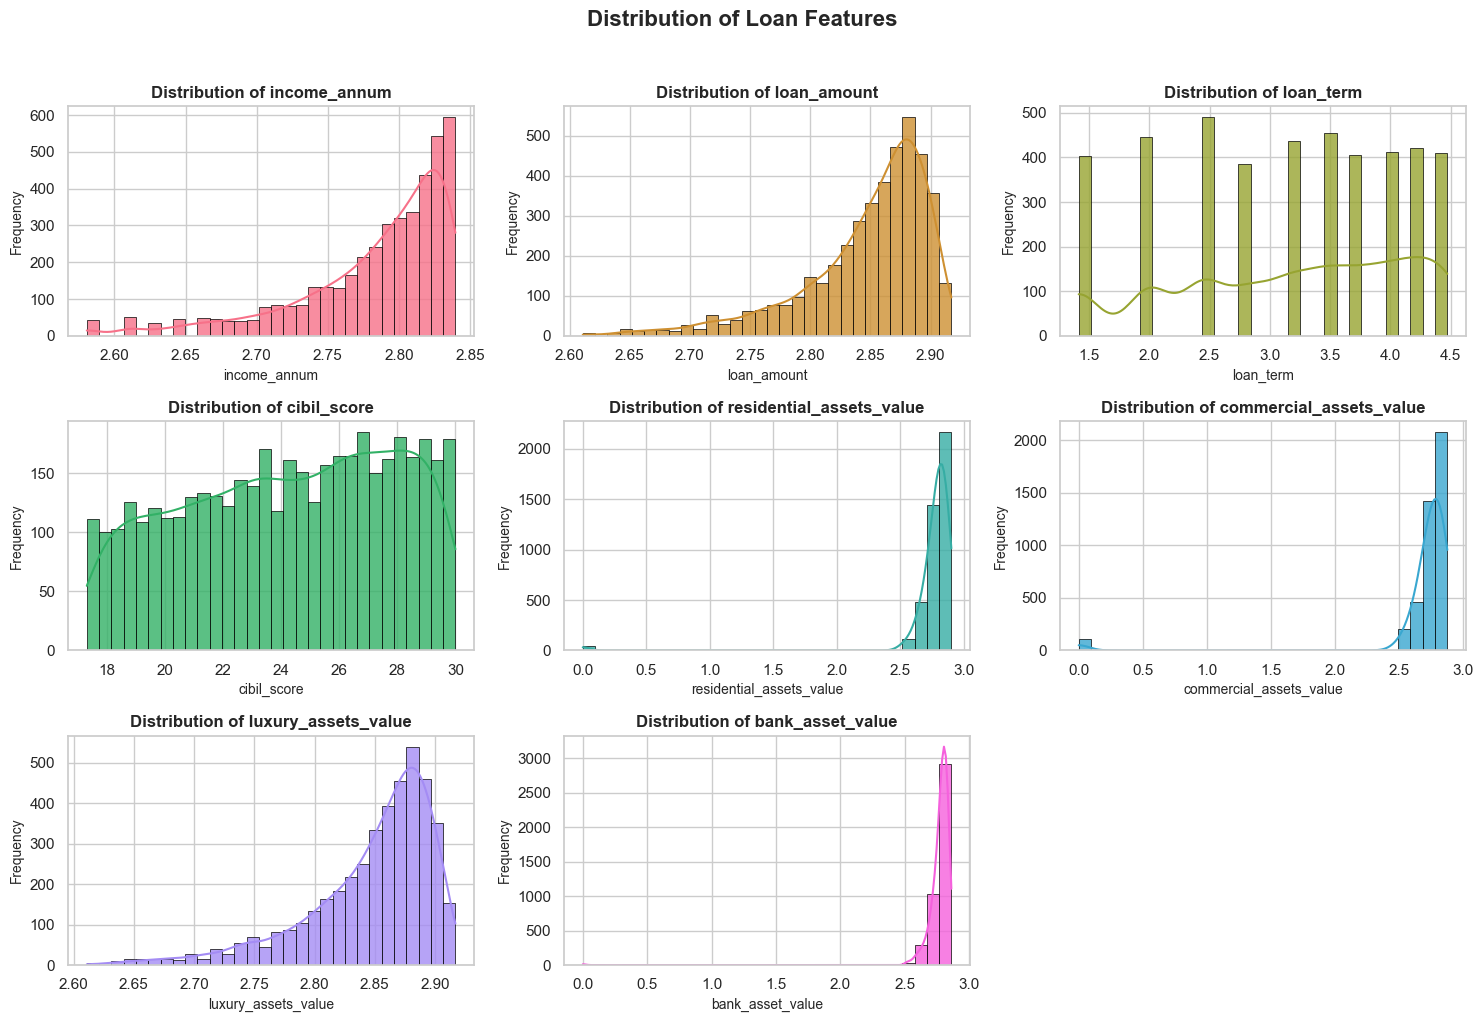

In [121]:

import seaborn as sns
import matplotlib.pyplot as plt

# Theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 10))

# Custom color palette
colors = sns.color_palette("husl", len(cols))  # colorful but balanced

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)  # 3×3 grid
    
    sns.histplot(
        model_data[col], 
        kde=True, 
        bins=30, 
        color=colors[i % len(colors)], 
        edgecolor="black", 
        linewidth=0.5, 
        alpha=0.8
    )
    
    plt.title(f"Distribution of {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)

plt.suptitle("Distribution of Loan Features", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


In [122]:
# We can see that earlier the data did not had a normal distribution now it follows a somehow normal distribution.

In [123]:
# Creating dummies for the categorical variables
model_data = pd.get_dummies(model_data, dtype = int)


In [124]:
model_data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,loan_status_Approved,loan_status_Rejected
0,2,2.837749,2.902156,3.464102,27.892651,2.753086,2.872627,2.886914,2.827015,1,0,1,0,1,0
1,0,2.786646,2.851686,2.828427,20.420578,2.760564,2.747525,2.832640,2.773178,0,1,0,1,0,1
2,3,2.834611,2.901787,4.472136,22.494444,2.819926,2.792366,2.908052,2.854454,1,0,1,0,0,1
3,3,2.828475,2.903605,2.828427,21.610183,2.874521,2.773178,2.888368,2.826270,1,0,1,0,0,1
4,5,2.838955,2.890475,4.472136,19.544820,2.852624,2.828475,2.901230,2.798801,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,2.695675,2.750370,3.464102,17.804494,2.762862,2.647760,2.773178,2.680499,1,0,0,1,0,1
4265,0,2.773178,2.847250,4.472136,23.643181,2.788130,2.765074,2.845688,2.738086,0,1,0,1,1,0
4266,2,2.814649,2.889782,4.242641,21.377558,2.707906,2.852624,2.874210,2.821580,0,1,1,0,0,1
4267,1,2.786646,2.854454,2.828427,27.928480,2.828475,2.671306,2.860009,2.807797,0,1,1,0,1,0


In [126]:
model_data = model_data.rename(columns = {'loan_status_Approved': 'Loan_Status'})

model_data.isnull().sum()

no_of_dependents             0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    28
commercial_assets_value      0
luxury_assets_value          0
bank_asset_value             0
education_Graduate           0
education_Not Graduate       0
self_employed_No             0
self_employed_Yes            0
Loan_Status                  0
loan_status_Rejected         0
dtype: int64

In [127]:
model_data.isnull().sum()

no_of_dependents             0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    28
commercial_assets_value      0
luxury_assets_value          0
bank_asset_value             0
education_Graduate           0
education_Not Graduate       0
self_employed_No             0
self_employed_Yes            0
Loan_Status                  0
loan_status_Rejected         0
dtype: int64

## Feature selection

<Axes: xlabel='count', ylabel='Loan_Status'>

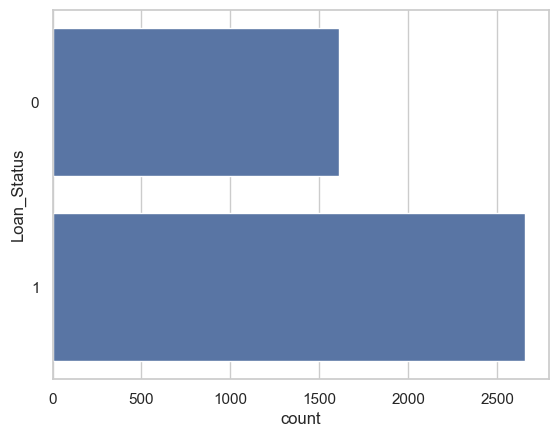

In [181]:
sns.countplot(y = y, data = model_data)

In [182]:
#Data Normalization

x = MinMaxScaler().fit_transform(x)
x

array([[0.4       , 0.99304565, 0.95048428, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.79563902, 0.78576935, ..., 0.        , 1.        ,
        1.        ],
       [0.6       , 0.9809274 , 0.94928145, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.4       , 0.90381288, 0.91010112, ..., 1.        , 0.        ,
        1.        ],
       [0.2       , 0.79563902, 0.79480478, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.98340655, 0.94928145, ..., 1.        , 0.        ,
        0.        ]], shape=(4269, 14))

In [157]:
#Train test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
# Logistic regression gives us 92% accuracy

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create the model
dt_classifier = DecisionTreeClassifier(random_state=1)

# Train
dt_classifier.fit(x_train, y_train)

# Predict
y_pred_dt = dt_classifier.predict(x_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       523

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [ ]:
# Decession tree classification gives us 99% accuracy

In [184]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Train
rf_classifier.fit(x_train, y_train)

# Predict
y_pred_rf = rf_classifier.predict(x_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       523

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [ ]:
# Decession random forest gives us 98% accuracy